# Random Forest 

        It is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression which makes it as ensemble learning technique. This helps in improving accuracy and reducing errors.

# Handwritten Digits Classification with Random Forests


This work is an easy example of how the random forest classifier can be employed to learn a model to classify handwritten digits.

The data set is taken from a kaggle.com challenge, and you can find the respective kernel here: 

https://www.kaggle.com/michaelnie/simple-random-forest-classification/

# 1. Training Phase

Let's start with training the model.

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display


# 1.1 Data Set

First, we import the training set and have a look at the data structure

In [11]:
data = pd.read_csv('train.csv.xls')
display(data.head(n=3))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the first column indicates the respective number, and the following 784 columns contain a intensity value ranging from 0 to 255. They describe a 28 x 28 image that contains the handwritten number.

Let's have a look at an example image:

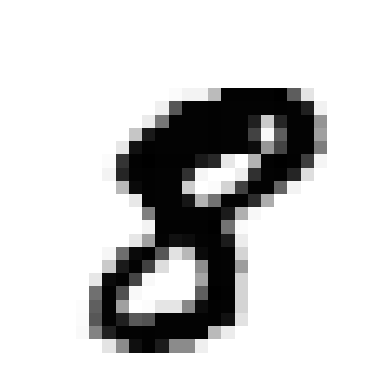

In [12]:
ex_row = data.iloc[[10]].values.ravel()
ex_img = np.array(ex_row[1:].reshape(28, 28), dtype="float32")
plt.imshow(ex_img, cmap = 'Greys')
plt.axis('off')
plt.show()

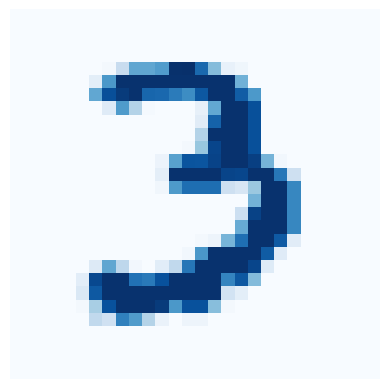

In [13]:
ex_row = data.iloc[[9]].values.ravel()
ex_img = np.array(ex_row[1:].reshape(28, 28), dtype="float32")
plt.imshow(ex_img, cmap = 'Blues')
plt.axis('off')
plt.show()

Looks like an 8! Let's have a look what was indicated in the data:

In [14]:
display(ex_row[0])

np.int64(3)

# 1.2 Restructuring the Data Set and Learning the Classifier

We can now move to the interesting part as we have already understood the data we are analysing. First, we have to set up our data in such a way that the following random forest classifier can be applied.

As so often, we have to construct an array X of the form [n_samples, k_features], and in our case, we have 784 features - each pixel is one feature. For the y values, we have to construct a [n_samples, n_outputs] array, and in our case we only have one output for each image (the number) resulting in a n-dim vector.

In [15]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [16]:
data_matrix = data.to_numpy()
X = data_matrix[:, 1:]
y = data_matrix[:, 0]




In [18]:
data_matrix = data.values
X = data_matrix[:, 1:]
y = data_matrix[:, 0]

Finally, we train our classifier:

In [19]:
rfc = RandomForestClassifier(n_estimators=10).fit(X, y)

#  Testing

We import the testing data and apply our classfier to the new data:

In [20]:
test_data = pd.read_csv('test.csv.xls').to_numpy()
display(test_data.shape)

(28000, 784)

In [21]:
predicted_numbers = rfc.predict(test_data)
display(predicted_numbers)

array([2, 0, 9, ..., 3, 9, 2])

Finally, we can save the results in a csv file.

In [22]:
results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1), 'Label': predicted_numbers})
results_data.to_csv('results.csv', sep=',', index=False)

# Results

Done! The produced predictions achieved an accuracy score of 94% which is quite remarkable for such a simple classifier in my opinion.

I hope you enjoyed the introduction to handwritten digit classification with random forests. If you have any questions, please just let me know!

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [24]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
y_train

array([5, 2, 0, ..., 2, 9, 4])

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
print('Accuracy of my Model:',accuracy_score(y_test,y_pred)*100,'%')

Accuracy of my Model: 96.37142857142858 %
